Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv


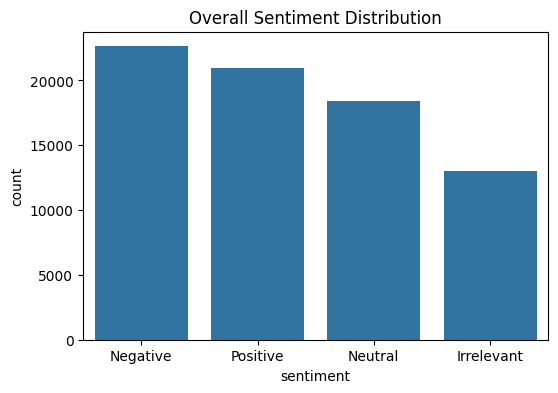

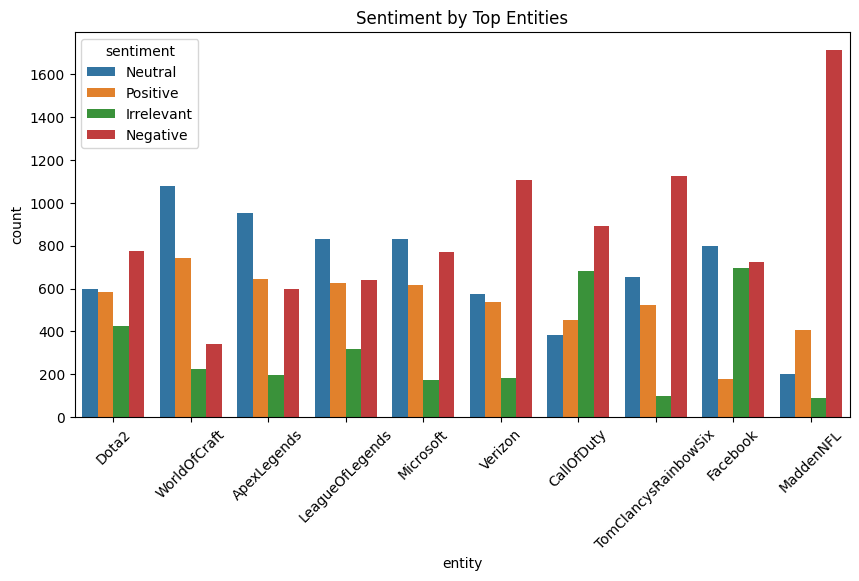

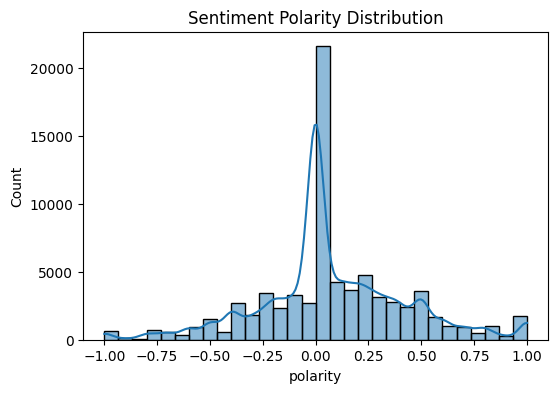

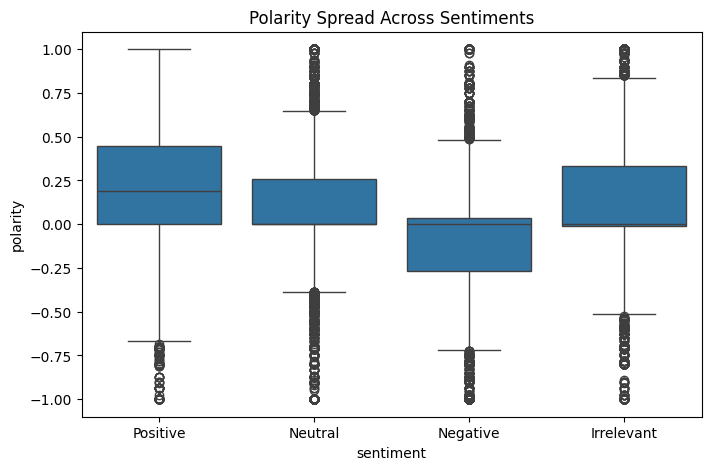

In [4]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import io

uploaded = files.upload()

files_list = list(uploaded.keys())
train_file = [f for f in files_list if "training" in f.lower()][0]
val_file = [f for f in files_list if "validation" in f.lower()][0]

train_df = pd.read_csv(io.BytesIO(uploaded[train_file]), header=None)
val_df = pd.read_csv(io.BytesIO(uploaded[val_file]), header=None)

train_df.columns = ["id","entity","sentiment","text"]
val_df.columns = ["id","entity","sentiment","text"]

df = pd.concat([train_df, val_df], ignore_index=True)
df = df.dropna(subset=["text","sentiment"])

df["polarity"] = df["text"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index)
plt.title("Overall Sentiment Distribution")
plt.show()

top_entities = df["entity"].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(x="entity", hue="sentiment", data=df[df["entity"].isin(top_entities)])
plt.xticks(rotation=45)
plt.title("Sentiment by Top Entities")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["polarity"], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="sentiment", y="polarity", data=df)
plt.title("Polarity Spread Across Sentiments")
plt.show()
